In [139]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
from CoreFunctions import *
from RiskReturn import *
from PyPortfolio import *
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','^FTSE','^NSEI'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


In [141]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [153]:
portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')


In [181]:
z =EfficientFrontier(riskreturn_object.get_return_series(),riskreturn_object.get_return_periodicity() )

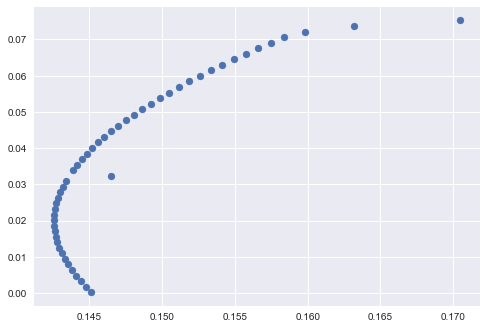

In [182]:
plt.plot(z[0]['Volatility'], z[0]['Returns'])

In [169]:
z

(     Returns  Volatility
 0   0.000204    0.145138
 1   0.001735    0.144759
 2   0.003268    0.144410
 3   0.004799    0.144090
 4   0.006330    0.143799
 5   0.007863    0.143538
 6   0.009394    0.143308
 7   0.010927    0.143107
 8   0.012459    0.142938
 9   0.013990    0.142799
 10  0.015522    0.142692
 11  0.017054    0.142616
 12  0.018586    0.142571
 13  0.020118    0.142565
 14  0.021650    0.142578
 15  0.023181    0.142630
 16  0.024713    0.142714
 17  0.026245    0.142830
 18  0.027776    0.142986
 19  0.029309    0.143158
 20  0.030840    0.143366
 21  0.032372    0.143600
 22  0.033904    0.143864
 23  0.035436    0.144156
 24  0.036968    0.144476
 25  0.038500    0.144860
 26  0.040031    0.145200
 27  0.041563    0.145604
 28  0.043095    0.146036
 29  0.044627    0.146496
 30  0.046159    0.146984
 31  0.047690    0.147498
 32  0.049222    0.148041
 33  0.050754    0.148610
 34  0.052286    0.149206
 35  0.053818    0.149829
 36  0.055350    0.150479
 37  0.05688